In [ ]:
## %% [markdown]
# # requirements
import math
import itertools
import time
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# root path
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
sys.path.append(project_root)

# Now you can import from src
from src.app.utils import open_json

# %%
df = pd.read_json('../data/job_offers.json')
df

[nltk_data] Downloading package words to /home/usuario/nltk_data...
[nltk_data]   Package words is already up-to-date!


,vacancy_name,company,location,work_modality_english,seniority,link,job_function,industries,description,apply_link,publication_date,query_keyword,country,scraping_date,job_id,remote,skills,available,available_reviewed
0,Billing Specialist,Ottomatik.io,"Bogota, D.C., Capital District, Colombia",Full-time,Associate,https://co.linkedin.com/jobs/view/billing-spec...,Finance,Desktop Computing Software Products,"Hi there! We are South, and our client is look...",None,2025-06-11,proactive,Colombia,2025-06-11,RvnoFtvdZxP9CkTV9ZtbhY,True,"[r, c, rag, attention to detail, flexibility, ...",True,True
1,Coordinador de Desarrollo y operaciones con ex...,Liquitty,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/coordinador-...,Other,Collection Agencies,Estamos en busca de un profesional con experie...,,2025-06-11,SQL,colombia,2025-06-11,P85Ddwg3C5r57TTwZaJM5o,False,"[r, c]",True,True
2,Arquitecto de Solución Semi Senior 💡,Apiux Tech,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/arquitecto-d...,"Design, Art/Creative, and Information Technology",IT Services and IT Consulting,¿Quiénes somos?🙂\n\nEn APIUX nos identificamos...,,2025-06-11,SQL server,colombia,2025-06-11,ipd6aWy5gyhG7jdPohrGPB,False,"[sql, r, c, mlops, sql server, postgresql, doc...",True,True
3,Desarrollador .NET y Angular,AudiSoft,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/desarrollado...,Engineering and Information Technology,Software Development,"En AudiSoft, estamos en la búsqueda de persona...",,2025-06-11,SQL server,colombia,2025-06-11,DumJCi78aZRMLQoDBGoEUt,False,"[sql, r, c, .net, sql server, angular]",True,True
4,Fullstack Software Engineer Associate,Scotiabank,"Bogota, D.C., Capital District, Colombia",Full-time,Associate,https://co.linkedin.com/jobs/view/fullstack-so...,Engineering and Information Technology,Banking,Requisition ID: 223621\n\nThanks for your inte...,,2025-06-11,SQL server,colombia,2025-06-11,ZocNsUWudpkNvm4CQ6Ww2M,False,"[sql, java, scala, r, c, c#, .net, typescript,...",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Analista Administrativo Senior,Artefact,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/analista-adm...,Advertising and Consulting,"IT Services and IT Consulting, Information Ser...",Quienes somos\n\n¡En Artefact LATAM creemos y ...,,2025-06-08,Analista de eventos,colombia,2025-06-09,MBwgdE9PuE4zgyfHW8NDo4,False,"[atención al detalle, sql, r, c, vba, habilida...",True,True
518,Asistente Ejecutiva Estratégica del CEO,Aló Credit Colombia S.A.S,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/asistente-ej...,Administrative,Financial Services,¡ÚNETE A ALÓ CREDIT!\n\nALÓ CREDIT es una Fint...,,2025-06-08,leadership,colombia,2025-06-09,VnY34s4iZDCLrTcbKs4caq,False,"[atención al detalle, r, c, liderazgo, respons...",True,True
519,Data Engineer,⚡ GoodUnited ⚡,"Medellín, Antioquia, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/data-enginee...,Information Technology,Software Development,GoodUnited is a fundraising software that help...,,2025-06-08,Airflow,colombia,2025-06-09,TLTSewQFCphgtk2tBh3Lu2,True,"[python, sql, scala, r, c, rag, snowflake, pos...",True,True
520,Asistente de tesoreria,Wood,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/asistente-de...,Finance and Sales,Professional Services,"Job Description\n\n""Explorando talentos para f...",,2025-06-08,PowerBI,colombia,2025-06-09,6zx84XRE92JEmLePwZ6M2P,False,"[atención al detalle, trabajo en equipo, r, c,...",True,True


In [ ]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 521
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vacancy_name           522 non-null    object
 1   company                522 non-null    object
 2   location               522 non-null    object
 3   work_modality_english  522 non-null    object
 4   seniority              522 non-null    object
 5   link                   522 non-null    object
 6   job_function           520 non-null    object
 7   industries             522 non-null    object
 8   description            522 non-null    object
 9   apply_link             329 non-null    object
 10  publication_date       522 non-null    object
 11  query_keyword          522 non-null    object
 12  country                522 non-null    object
 13  scraping_date          522 non-null    object
 14  job_id                 522 non-null    object
 15  remote                 522 n

In [ ]:
# %%

df.describe().T

,count,unique,top,freq
vacancy_name,522,493,Data Engineer,6
company,522,346,Lumenalta,19
location,522,49,"Bogota, D.C., Capital District, Colombia",200
work_modality_english,522,2,Full-time,521
seniority,522,7,Mid-Senior level,329
link,522,522,https://co.linkedin.com/jobs/view/billing-spec...,1
job_function,520,88,Engineering and Information Technology,102
industries,522,152,IT Services and IT Consulting,121
description,522,522,"Hi there! We are South, and our client is look...",1
apply_link,329,1,,329


In [ ]:
# %%

df.columns

Index(['vacancy_name', 'company', 'location', 'work_modality_english',
       'seniority', 'link', 'job_function', 'industries', 'description',
       'apply_link', 'publication_date', 'query_keyword', 'country',
       'scraping_date', 'job_id', 'remote', 'skills', 'available',
       'available_reviewed'],
      dtype='object')

In [ ]:
# %%

df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features = [col for col in object_features if col != 'skills']
object_features

['vacancy_name',
 'company',
 'location',
 'work_modality_english',
 'seniority',
 'link',
 'job_function',
 'industries',
 'description',
 'apply_link',
 'publication_date',
 'query_keyword',
 'country',
 'scraping_date',
 'job_id']

In [ ]:
# %%

float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

[]

In [ ]:
# %%

bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

['remote', 'available', 'available_reviewed']

In [ ]:
# %%

df[object_features].describe(include='all').T

,count,unique,top,freq
vacancy_name,522,493,Data Engineer,6
company,522,346,Lumenalta,19
location,522,49,"Bogota, D.C., Capital District, Colombia",200
work_modality_english,522,2,Full-time,521
seniority,522,7,Mid-Senior level,329
link,522,522,https://co.linkedin.com/jobs/view/billing-spec...,1
job_function,520,88,Engineering and Information Technology,102
industries,522,152,IT Services and IT Consulting,121
description,522,522,"Hi there! We are South, and our client is look...",1
apply_link,329,1,,329


In [ ]:
# %%

for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>vacancy_name : ['Billing Specialist'
 'Coordinador de Desarrollo y operaciones con experiencia en metodologías agiles'
 'Arquitecto de Solución Semi Senior 💡' 'Desarrollador .NET y Angular'
 'Fullstack Software Engineer Associate' 'GIS Specialist III - Water'
 'Data Engineering Associate'
 'Administrador de Bases de Datos Senior – Oracle y SQL'
 'Sr Data Engineer' 'Salesforce Developer - Bogota, CloudKitchens'
 'Functional Developer (Actuarial)' 'Sr. Automation Engineer'
 'Backend Go Developer (Middle-Senior)' 'CyberSecurity Analyst'
 'Data Warehouse Developer Senior' 'QA Performance Engineer'
 'Senior Full Stack Developer' 'Analista de Infraestructura TI'
 'Agente de Soporte Field Service'
 'Senior Analyst, Risk Management-R-248510' 'Supervisor de Tecnología'
 'Auxiliar Mantenimiento' 'Representante de Ventas'
 'Supply Chain Manager Nutritionals LATAM' 'Auxiliar administrativo/a'
 'Operational Excellence Partner | Depot' 'Senior Data Analyst'
 'Senior DevOps Engineer (LatAm, No

In [ ]:
# %%

df.shape

(522, 19)

# %% [markdown]

 # null values visualization

Text(50.722222222222214, 0.5, 'Fila')

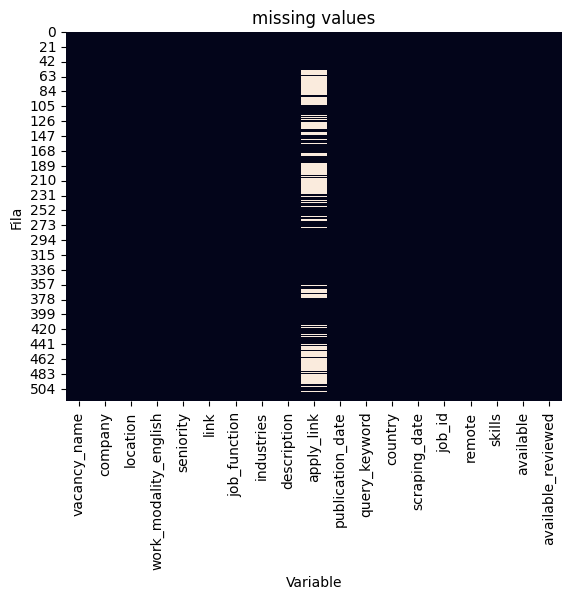

In [ ]:
# %%

sns.heatmap(df.isnull(), cbar=False)
plt.title("missing values")
plt.xlabel('Variable')
plt.ylabel('Fila')

In [ ]:
# %%

# # categorical variables

Text(0.5, 1.0, "'industries'")

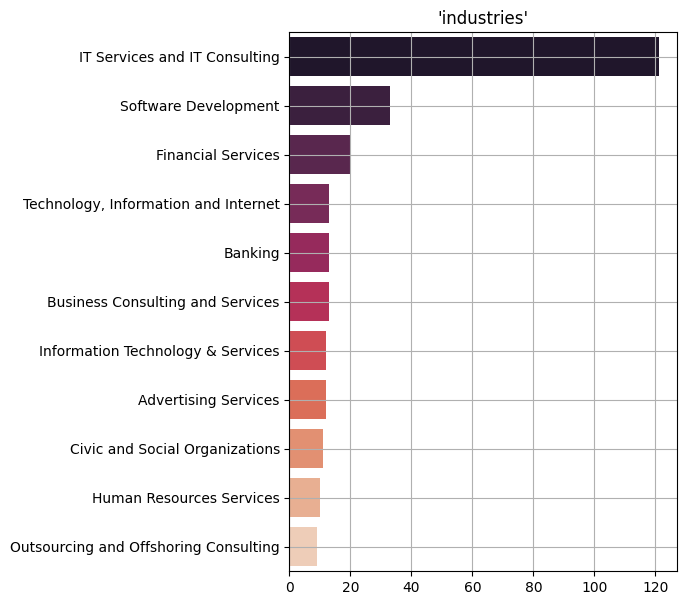

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['industries'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'industries'")

Text(0.5, 1.0, "'company'")

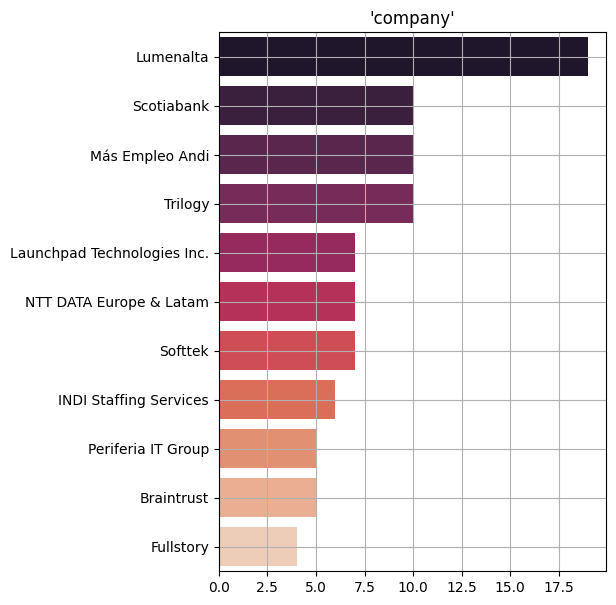

In [ ]:
# %%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

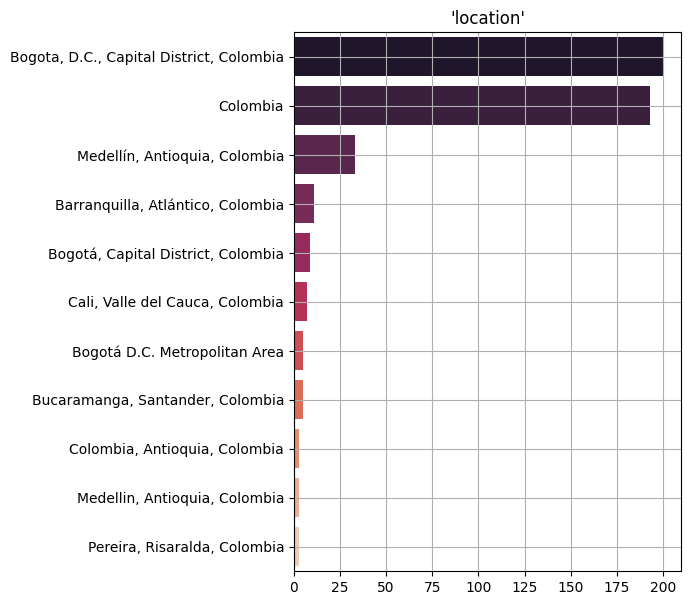

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

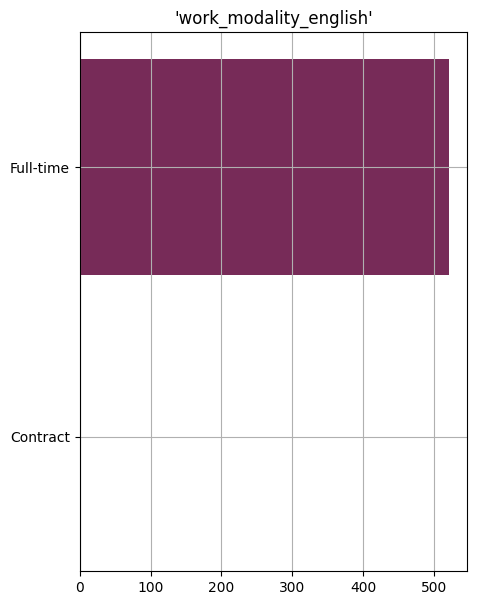

In [ ]:
# %%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

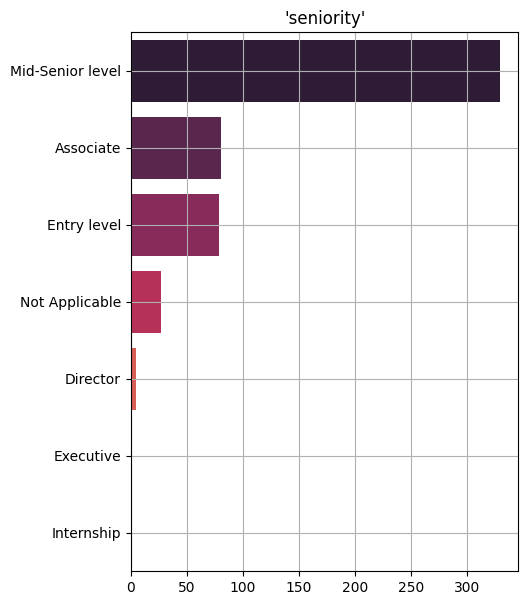

In [ ]:
# %%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

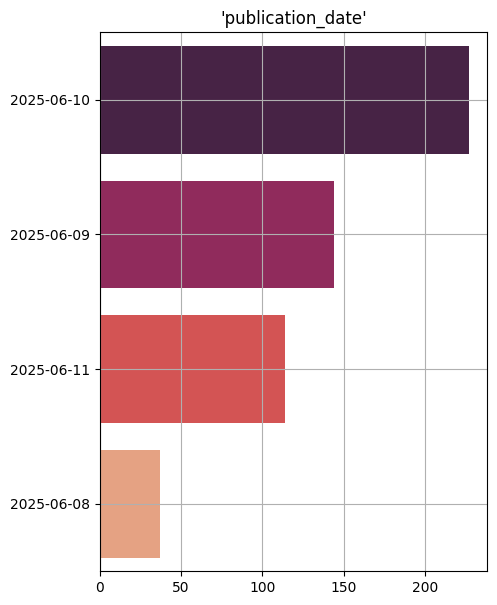

In [ ]:
# %%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

In [ ]:
# %%

print(f'job offers in the last 3 days: {df[df["publication_date"] > (datetime.now() - timedelta(days=3)).strftime("%Y-%m-%d")].shape[0]}')
df[df['publication_date'] > (datetime.now() - timedelta(days=3)).strftime('%Y-%m-%d')][['skills']].head(60)

job offers in the last 3 days: 341


,skills
0,"[r, c, rag, attention to detail, flexibility, ..."
1,"[r, c]"
2,"[sql, r, c, mlops, sql server, postgresql, doc..."
3,"[sql, r, c, .net, sql server, angular]"
4,"[sql, java, scala, r, c, c#, .net, typescript,..."
5,"[python, sql, r, c, rust, sql server, relation..."
6,"[python, sql, scala, r, c, rag, sql server, et..."
7,"[sql, r, c, sql server, oracle database, respo..."
8,"[python, sql, scala, r, c, rag, snowflake, big..."
9,"[r, c, web services, communication]"


In [ ]:
# %%

print(f'job offers of 4 days ago: {df[df["publication_date"] == (datetime.now() - timedelta(days=4)).strftime("%Y-%m-%d")].shape[0]}')
df[df['publication_date'] == (datetime.now() - timedelta(days=4)).strftime('%Y-%m-%d')][['skills']].head(60)

job offers of 4 days ago: 37


,skills
485,"[r, c, rag, azure, power bi, team player]"
486,"[r, c, communication]"
487,"[java, r, c, javascript, rag, react]"
488,"[r, c, rag, react, react native]"
489,"[python, r, c, dynamodb, aws, react, graphql, ..."
490,"[java, r, c, javascript, rag, aws, azure, team..."
491,"[java, r, c, javascript, rag, aws, azure, team..."
492,"[python, scala, r, c, rag, aws, azure, gcp, ku..."
493,"[sql, r, c, rust, rag, problem-solving skills,..."
494,"[sql, r, c, rag, react, team player]"
